In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


In [4]:
# 특징과 라벨 분리
X = df.drop(['Type'], axis = 1)
Y = df['Type']

In [5]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape

(160, 8)

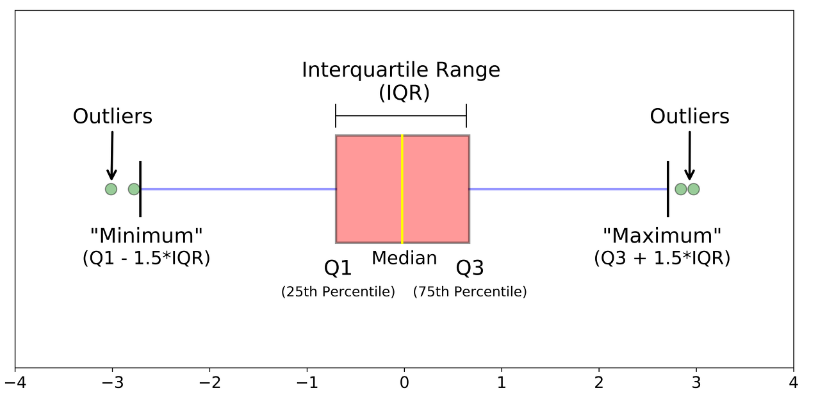

In [6]:
import numpy as np
def IQR_rule(val_list):  # 한 컬럼에 포함된 값이 파라미터로 전달
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3 - Q1
    
    # IQR rule을 위배하지 않는 bool list 계산 (True : 이상치 X, False : 이상치 0)
    # 이상치 조건 : Q3 + 1.5 * IQR 초과하거나 Q1 - 1.5 * IQR 미만이거나
    # Q3 + 1.5 * IQR > val_list 는 val_list가 상위 이상치 이하면 True
    # Q1 - 1.5 * IQR < val_list 는 val_list가 하위 이상치 이상이면 True
    
    not_outlier_condition = (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)
    return not_outlier_condition

In [7]:
IQR_rule(df['RI'])

0      True
1      True
2      True
3      True
4      True
       ... 
209    True
210    True
211    True
212    True
213    True
Name: RI, Length: 214, dtype: bool

In [8]:
conditions = Train_X.apply(IQR_rule)

In [9]:
conditions

,RI,Na,Mg,Al,Si,K,Ca,Fe
124,True,True,True,True,True,True,True,True
175,True,True,True,True,True,True,False,False
147,True,True,True,True,True,True,True,True
174,True,True,True,True,True,True,True,False
182,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
129,True,True,True,True,True,True,True,True
213,True,True,True,True,True,True,True,True
101,True,True,True,True,True,True,True,True
144,True,True,True,True,True,True,True,True


In [10]:
conditions.sum(axis=1) == 8

124     True
175    False
147     True
174    False
182     True
       ...  
129     True
213     True
101     True
144     True
70      True
Length: 160, dtype: bool

In [11]:
total_condition = conditions.sum(axis=1) == len(Train_X.columns)
total_condition

124     True
175    False
147     True
174    False
182     True
       ...  
129     True
213     True
101     True
144     True
70      True
Length: 160, dtype: bool

In [12]:
Train_X = Train_X.loc[total_condition]  # 이상치가 하나라도 있는 행은 제거
Train_X.shape

(120, 8)

### 전체 컬럼에서 이상치가 있는 컬럼이 1개라도 있는 관측치(행)는 모두 제거하는 코드
- 전체 데이터 중 한 컬럼이라도 이상치가 있으면 제거하므로 데이터 수가 많이 감소될 수 있음